<a href="https://colab.research.google.com/github/villagraciaa/portfolio-theory-and-asset-pricing/blob/master/Submission_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
A. Calculate the expected return in the upcoming year. Use the Capital Asset Pricing Model and the given parameters

In [7]:
#Import libraries needed
import pandas as pd
import numpy as np 
import scipy.stats as stats
import statsmodels.api as sm

#Assign Given parameters
b1=1.07  #XLE beta
b2=1.06  #XLI beta
Rf=0.0225 #risk free rate
Rm=0.09   #Market return
sigma=0.15 #Market standard deviation 

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
beta=np.array([b1,b2])
ERi = Rf + beta*(Rm-Rf)
print("Expected Return of XLE: ",ERi[0]*100,"%")
print("Expected Return of XLI: ",ERi[1]*100,"%")

Expected Return of XLE:  9.4725 %
Expected Return of XLI:  9.405 %


Calculate the daily and annualized standard deviation of returns for the prior year. Use the
MS Excel spreadsheet provided titled “GWP_PTAP_Data.xlsx”. When annualizing daily
standard deviation, assume there are 252 trading days in a year.

In [3]:
#Load data
url="https://raw.githubusercontent.com/villagraciaa/portfolio-theory-and-asset-pricing/master/XLEXLI.csv"
raw= pd.read_csv(url, parse_dates=True, index_col=0)

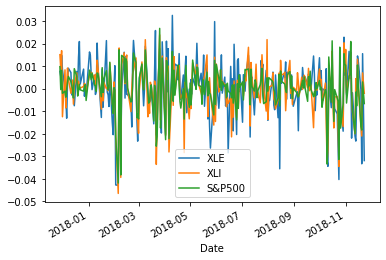

In [4]:
#Calculating daily returns from data
daily_returns=pd.DataFrame(data=None,columns=["XLE","XLI"])
daily_returns=np.log(raw.div(raw.shift()))
daily_returns=daily_returns.dropna()
daily_returns.plot()

In [5]:
#Calculating standard deviation
print("Daily Returns Standard Deviation in Percent")
print(100*daily_returns.std())
#
print("")
print("Annualized Standard Deviation in Percent")
print(np.sqrt(252)*daily_returns.std()*100)


Daily Returns Standard Deviation in Percent
XLE       1.280011
XLI       1.078390
S&P500    0.936042
dtype: float64

Annualized Standard Deviation in Percent
XLE       20.319540
XLI       17.118915
S&P500    14.859202
dtype: float64


To compare the beta's, we compute for the slope of S&P500 market returns vs. XLE (or XLI) returns

In [11]:
# Add a constant to the independent value
XLE_model = sm.OLS(daily_returns["XLE"], sm.add_constant(daily_returns['S&P500']))
XLI_model = sm.OLS(daily_returns["XLI"], sm.add_constant(daily_returns['S&P500']))

# fit XLE model and print results
XLE_results = XLE_model.fit()
print(XLE_results.summary())

# fit XLE model and print results
XLI_results = XLI_model.fit()
print(XLI_results.summary())

                            OLS Regression Results                            
Dep. Variable:                    XLE   R-squared:                       0.477
Model:                            OLS   Adj. R-squared:                  0.475
Method:                 Least Squares   F-statistic:                     226.0
Date:                Mon, 14 Sep 2020   Prob (F-statistic):           9.63e-37
Time:                        06:35:40   Log-Likelihood:                 816.30
No. Observations:                 250   AIC:                            -1629.
Df Residuals:                     248   BIC:                            -1622.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0002      0.001     -0.418      0.6

In [24]:
calc_beta1, intercept1, r_value1, p_value1, std_err1 = stats.linregress(daily_returns['S&P500'], daily_returns['XLE'])
print("XLE beta :",round(calc_beta1,2))
print("%diff :",round(100*abs(b1-calc_beta1)/b1,2),"%")
print("------------")
calc_beta2, intercept2, r_value2, p_value2, std_err2 = stats.linregress(daily_returns['S&P500'], daily_returns['XLI'])
print("XLI beta :",round(calc_beta2,2))
print("%diff : ",round(100*abs(b2-calc_beta2)/b2,2),"%")
print("------------")
print("Conclusion: Both results are within the 15% market standard deviation")

XLE beta : 0.94
%diff : 11.76 %
------------
XLI beta : 1.01
%diff :  4.32 %
------------
Conclusion: Both results are within the 15% market standard deviation


B. Calculate the correlation (to two (2) decimal places) between each sector’s return.

In [ ]:
correlation = stats.pearsonr(daily_returns["XLE"],daily_returns["XLI"])
print("Data Correlation:",round(correlation[0],2))

Data Correlation: 0.66
